In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def draw_board(paths, circuit_matrix, nets=None, save_name="test.jpg", clayer=0, via=False):
    
    # convert paths
    paths_x = []
    paths_y = []
    paths_z = []

    for path in paths:
        x_tmp = []
        y_tmp = []
        z_tmp = []
        for n in path:
            x_tmp.append(n[0])
            y_tmp.append(n[1])
            z_tmp.append(n[2])
        paths_x.append(x_tmp)
        paths_y.append(y_tmp)
        paths_z.append(z_tmp)

    width, height, layer = len(circuit_matrix), len(circuit_matrix[0]), len(circuit_matrix[0][0])
    fig = plt.figure(figsize=[width/4, height/4])

    ax = fig.add_subplot(111)

    # draw the grid
    for x in range(width):
        ax.plot([x, x], [0,height-1], color=(0.5,0.5,0.5,1))
    for y in range(height):
        ax.plot([0, width-1], [y,y], color=(0.5,0.5,0.5,1))

    # draw paths
    for p in range(len(paths_x)):

        if paths_x[p]:

            layer_path_x = defaultdict(list)
            layer_path_y = defaultdict(list)
            layer_idx = paths_z[p][0]
            tmp_x = []
            tmp_y = []
            for i, p_t in enumerate(paths_z[p]):
                if p_t==layer_idx:
                    tmp_x.append(paths_x[p][i])
                    tmp_y.append(paths_y[p][i])
                if p_t!=layer_idx or i==len(paths_z[p])-1:
                    layer_path_x[layer_idx].append(tmp_x)
                    layer_path_y[layer_idx].append(tmp_y)
                    tmp_x = [paths_x[p][i]]
                    tmp_y = [paths_y[p][i]]
                    layer_idx = p_t

            ph = plt.subplot()
            for idx in layer_path_x:
                color = "black"
                if idx==0:
                    color = "red"
                    alpha = 1.0
                elif idx==1:
                    color = "green"
                    alpha = 0.5
                elif idx==2:
                    color = "yellow"
                    alpha = 0.5
                elif idx==3:
                    color = "blue"
                    alpha = 0.5
                else:
                    color = "red"
                    alpha = 0.5
                for i in range(len(layer_path_x[idx])):
                    ph.plot(layer_path_x[idx][i], layer_path_y[idx][i], alpha=alpha, linewidth=5, color=color)

    # draw net number

    for x in range(width):
        for y in range(height):
            if not via:
                val = circuit_matrix[x][y][clayer]
                if val != 0:
                    ax.text(x, y, str(int(circuit_matrix[x][y][clayer])), fontsize=18, color='w',
                        horizontalalignment='center', verticalalignment='center')
            else:
                val = circuit_matrix[x][y][clayer]
                if val != 0:
                    ax.text(x, y, str(int(circuit_matrix[x][y][clayer])), fontsize=18, color='w',
                            horizontalalignment='center', verticalalignment='center')
    permenent_x = []
    permenent_y = []
    for x in range(width):
        for y in range(height):
            if not via and circuit_matrix[x][y][clayer] is None:
                permenent_x.append(y)
                permenent_y.append(x)
            elif via and circuit_matrix[x][y][clayer] is None:
                permenent_x.append(y)
                permenent_y.append(x)
    ax.scatter(permenent_y, permenent_x, marker='s', s=250, c='k')

    permenent_x = []
    permenent_y = []
    for x in range(width):
        for y in range(height):
            if not via and circuit_matrix[x][y][clayer] != 0:
                permenent_x.append(y)
                permenent_y.append(x)
            elif via and circuit_matrix[x][y][clayer] != 0:
                permenent_x.append(y)
                permenent_y.append(x)
    ax.scatter(permenent_y, permenent_x, marker='s', s=250, c='b')

    # scale the axis area to fill the whole figure
    ax.set_position([0,0,1,1])

    # get rid of axes and everything (the figure background will show through)
    # ax.set_axis_off()

    # scale the plot area conveniently (the board is in 0,0..18,18)
    ax.set_xlim(0,width-1)
    ax.set_ylim(0,height-1)
    
    fig.savefig(save_name)

[(20, 8, 0), (20, 8, 1), (22, 16, 0), (22, 16, 1)] (30, 26, 2)
[(16, 8, 0), (16, 8, 1), (17, 16, 0), (17, 16, 1)] (30, 26, 2)
[(12, 8, 0), (12, 8, 1), (12, 16, 0), (12, 16, 1)] (30, 26, 2)
[(8, 8, 0), (8, 8, 1), (7, 16, 0), (7, 16, 1)] (30, 26, 2)
[[[20, 8, 0], [20, 8, 1], [20, 8, 1]], [[20, 8, 1], [19, 8, 1], [19, 9, 1], [19, 10, 1], [19, 10, 0], [18, 10, 0], [18, 11, 0], [18, 11, 1], [18, 12, 1], [19, 12, 1], [20, 12, 1], [20, 13, 1], [20, 14, 1], [21, 14, 1], [22, 14, 1], [22, 15, 1], [22, 15, 0], [22, 16, 0]], [[22, 16, 0], [22, 16, 1], [22, 16, 1]], [[16, 8, 0], [16, 8, 1], [16, 8, 1]], [[16, 8, 1], [17, 8, 1], [18, 8, 1], [18, 7, 1], [19, 7, 1], [19, 7, 0], [19, 8, 0], [19, 9, 0], [18, 9, 0], [18, 9, 1], [18, 10, 1], [17, 10, 1], [17, 10, 0], [17, 9, 0], [16, 9, 0], [16, 9, 1], [16, 10, 1], [15, 10, 1], [15, 10, 0], [16, 10, 0], [16, 11, 0], [16, 11, 1], [17, 11, 1], [17, 11, 0], [17, 12, 0], [17, 13, 0], [17, 14, 0], [17, 15, 0], [17, 16, 0]], [[17, 16, 0], [17, 16, 1], [17, 16,

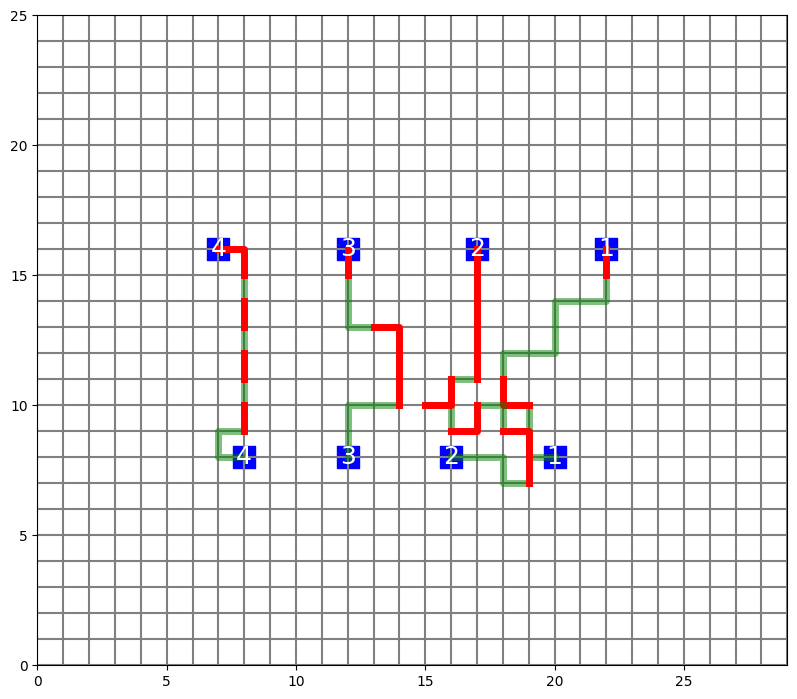

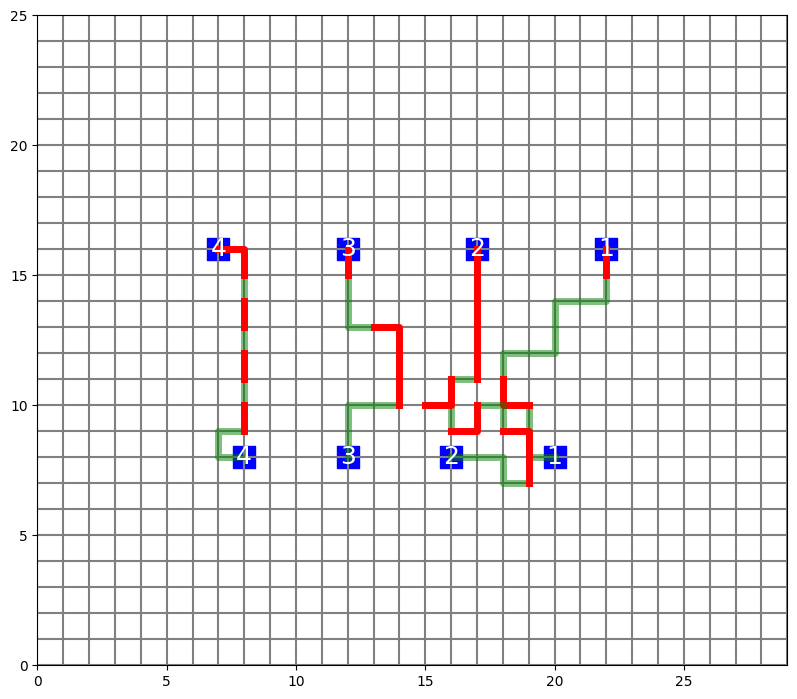

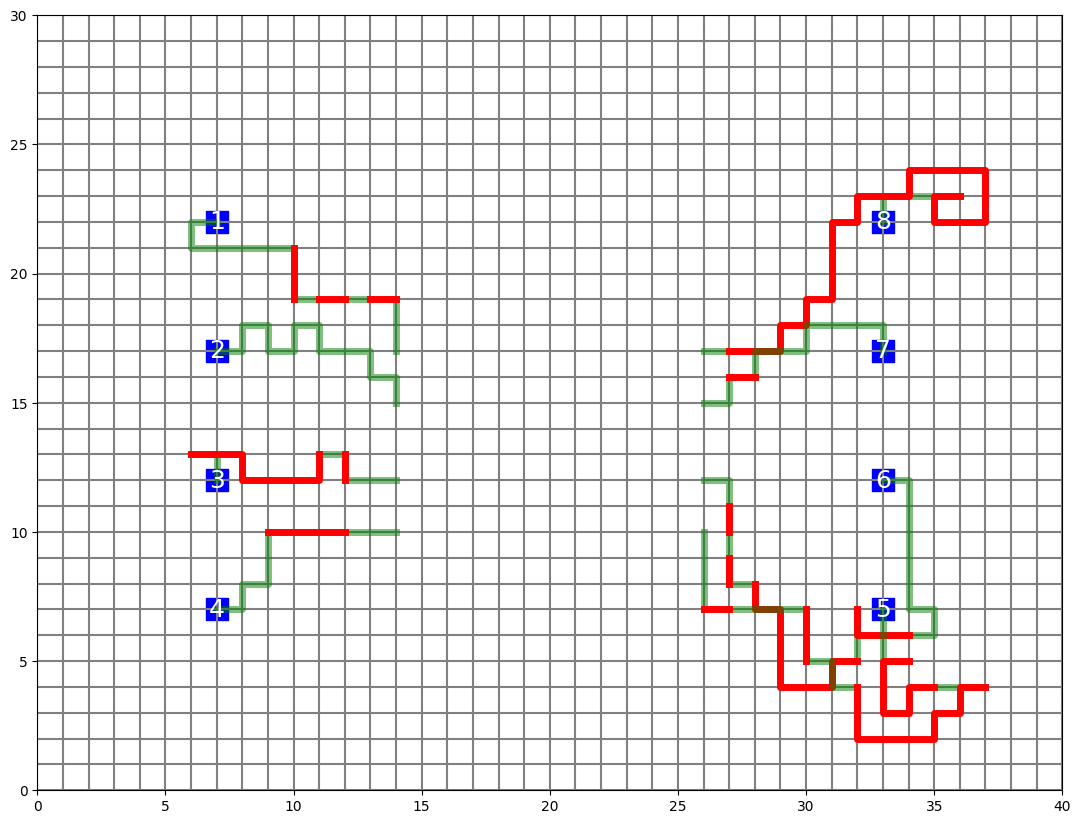

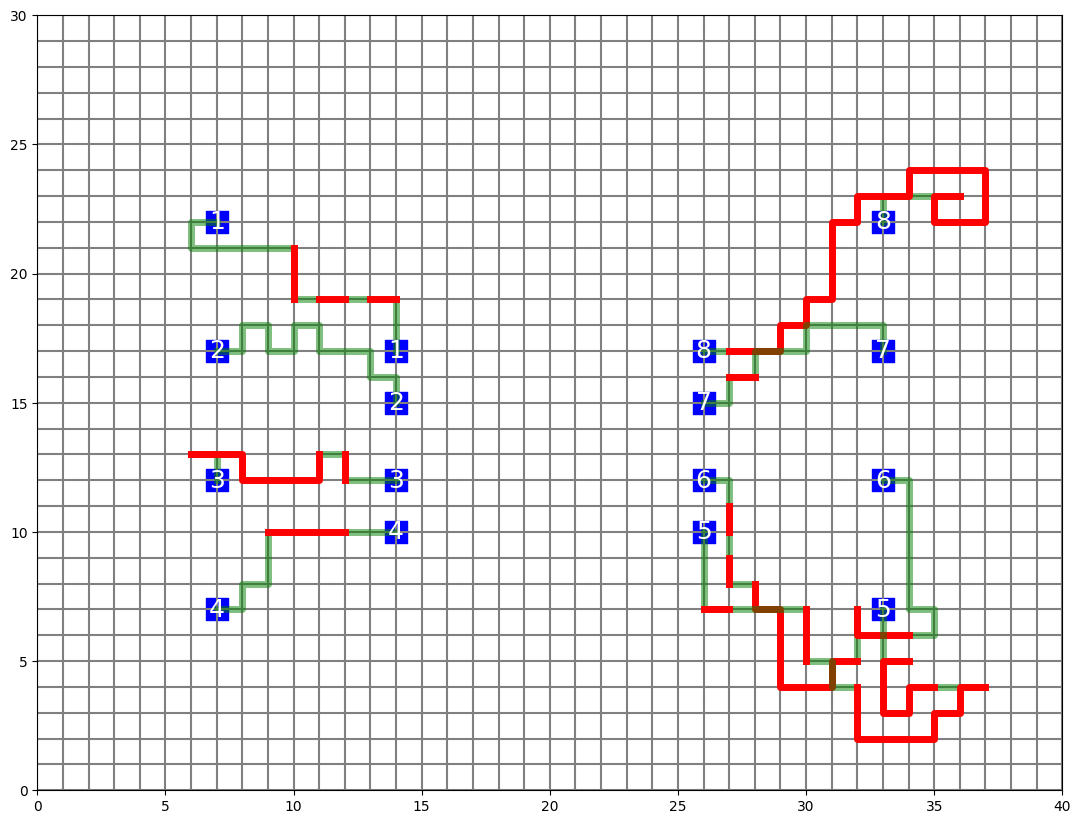

In [13]:
from MCTS_CREnv import MCTS_CREnv
import json

pcb_names = ["kitspace_grove_adaptor", "kitspace_sop8breakout"]

for pcb_name in pcb_names:
    board_path = f'../../PCBs/{pcb_name}/final.json'
    resolution = [0.5, 0.5]
    env_mcts = MCTS_CREnv(pcb_path=board_path, resolution=resolution)
    env_mcts.reset()
    board = env_mcts.board

    with open("./mcts_rl_1000_iters/path_" + pcb_name + '.json') as json_file:
        net_paths = json.load(json_file)

    paths = []
    for p in net_paths.values():
        paths += p
    print(paths)

    draw_board(paths=paths, circuit_matrix=board)
    draw_board(paths=paths, circuit_matrix=board, clayer=1)